In [28]:
import torch
import matplotlib.pyplot as plt
import torch.functional as F

In [29]:
o=torch.linspace(-1,1,100)
x=torch.unsqueeze(o,dim=1) # shape(100,1)
y=x.pow(2)+0.2*torch.rand(x.size())# add noisy y data(tensor)

# Saving

In [30]:
def save():
    # Net
    net1=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer=torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func=torch.nn.MSELoss()

    # Training
    for t in range(100):
        prediction=net1(x)
        loss=loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Plot Result
    plt.figure(1,figsize=(10,3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


    #有两种途径保存
    torch.save(net1,'net.pkl') #all network
    torch.save(net1.state_dict(),'net_params.pkl') #only parameters, 速度快占内存少

## Restore Net

In [31]:
def restore_net():
    # restore entire net1 to net2
    net2=torch.load('net.pkl')
    prediction=net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


## Restore Parameters

In [32]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )

    # copy net1 para into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction=net3(x)

     # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()


## Running

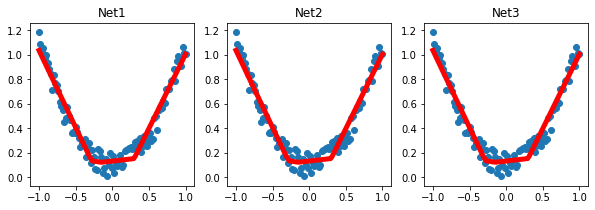

In [33]:
save()
restore_net()
restore_params()